# BLU04 - Learning Notebook - Part 1 of 3 - Pandas for Timeseries

## 1. A bit of housekeeping before we get started

Welcome to timeseries! 

Here we will learn how to explore datasets which depend on time. As you might imagine, many datasets in the real world are timeseries. The stockmarket springs to mind, but also anything to do with sales or marketing, engineering processes (when will this particular turbine break, you may ask?), medical processes (what is the effect of this medication over time), and so many, many more. 

Now, timeseries are a less settled field than most things you've learned so far. There are many ways of doing things, and different schools of thought fighting to get _"followers"_. Our objective here is to avoid indoctrination, but rather to give you a bit of exposure to the super-basics of how to handle timeseries data, and making some basic but useful predictions. We will in no way try to teach you everything, but rather enough to get your hands dirty. From then on, there is the good old fashioned documentation, and hacking around. 

Speaking of covering only the basics, as you might know Neural Networks are becoming increasingly prevalent in the prediction of timeseries. While this is a very exciting topic, we've decided not to include Neural Networks in the Academy, for three main reasons:
1. We want to make sure you gain a sold technical base, on which you can then later add NNs, rather than have you "run before you can walk" 
2. Teaching NNs is slow, as to be understood correctly there are a lot of tricks and "best practice" things to know, which don't necessarily have the most scientific of basis (it's still mostly an empirical field), so they do not fit well into the "basic intuition followed by practice" approach of the Academy 
3. There are already EXCELLENT resources to learn NNs, namely [Andrew NGs course on Coursera](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&cad=rja&uact=8&ved=0ahUKEwjVmcT5wtbaAhXHuRQKHc2yD2wQFggpMAA&url=https%3A%2F%2Fwww.coursera.org%2Fspecializations%2Fdeep-learning&usg=AOvVaw3vIqYhrM-dZQd6HUBci4QA), which are best approached after a solid technical foundation have been laid. 

Lastly, remember that time-series are notoriously tricky to evaluate. While with "static" data we can trust a few metrics and for the most part be done with it (yay _roc auc_!), in time-series the metrics tend to be more problem specific. The thing to remember is: your problems will be extra sneaky, and you will have to be extra careful. As a corolary to this, when you think you've predicted the stockmarket... you probably haven't. 

And now, let the fun begin! 

## Pandas for Timeseries 

In this BLU we will not learn any fancy prediction stuff, but rather how to wrangle timeseries data. 

Imports: 

In [1]:
import pandas as pd 
from matplotlib import pyplot as plt 
import numpy as np 
import utils
import matplotlib 

np.random.seed(1000)
% matplotlib inline 

#### Timestamps 

The timestamp is the most basic form of time series indexer that Pandas has. It does exactly what the name describes: marks the exact moment in which the data was collected. 

While kaggle datasets and other online challenges are normally clean "hourly" or "daily" dataset, TimeStamps are how most data is normally collected in the wild! 

An event happens, and the time of the even is dumped into a database. 

One example of this would be... bitcoin! Now, whatever you may think about bitcoin, _(whether it is a ponzi scheme or a perfectly legitimate way to destroy the enviroment while helping organ trafickers and kidnappers launder money)_, it is an excellent source of high-granularity data. Let's dive in! 

In [2]:
data = pd.read_csv('data/bitcoin.csv')

Let's take a look:

In [3]:
data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2017-01-01 00:00:00,973.37,973.37,973.35,973.35,2.122048,2065.524303,973.363509
1,2017-01-01 00:01:00,973.37,973.37,973.35,973.35,2.122048,2065.524303,973.363509
2,2017-01-01 00:02:00,973.37,973.37,973.35,973.35,2.122048,2065.524303,973.363509
3,2017-01-01 00:03:00,973.36,973.36,973.36,973.36,0.040000,38.934400,973.360000
4,2017-01-01 00:04:00,973.36,973.40,973.36,973.39,5.458800,5313.529708,973.387871


In [4]:
data.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
647996,2018-03-26 23:56:00,8155.00,8155.00,8154.99,8154.99,0.617945,5039.342643,8154.997667
647997,2018-03-26 23:57:00,8154.99,8154.99,8154.00,8154.01,40.655410,331543.193980,8154.958865
647998,2018-03-26 23:58:00,8154.00,8154.01,8150.00,8150.00,9.856911,80340.432933,8150.670628
647999,2018-03-26 23:59:00,8150.01,8150.01,8122.82,8145.00,68.274269,555026.852280,8129.370847
648000,2018-03-27 00:00:00,8144.99,8145.01,8140.00,8140.00,37.842674,308202.442620,8144.309384


Interesting. We have this `Timestamp` column, that we can kind of parse by looking at it. 

In [5]:
data.Timestamp.head()

0    2017-01-01 00:00:00
1    2017-01-01 00:01:00
2    2017-01-01 00:02:00
3    2017-01-01 00:03:00
4    2017-01-01 00:04:00
Name: Timestamp, dtype: object

We can kind of understand this. Looks like Year, month, and day, then hours, minutes, then seconds ...  

Let's inspect a random row: 

In [6]:
print('One of the times in our dataset: %s' % data.Timestamp.iloc[3])
print('Type of the Series (data.Time):  %s' % data.Timestamp.dtype)
print('Type of a particular time:       %s' % type(data.Timestamp.iloc[3]))

One of the times in our dataset: 2017-01-01 00:03:00
Type of the Series (data.Time):  object
Type of a particular time:       <class 'str'>


Ah, so these are just strings. How boring. 

However, pandas can do something pretty amazing with these strings: 

In [7]:
time_as_a_timestamp = pd.to_datetime(data.Timestamp, infer_datetime_format=True)

What is it now? 

In [8]:
time_as_a_timestamp.head(2)

0   2017-01-01 00:00:00
1   2017-01-01 00:01:00
Name: Timestamp, dtype: datetime64[ns]

In [9]:
time_as_a_timestamp.min()

Timestamp('2017-01-01 00:00:00')

In [10]:
time_as_a_timestamp.max()

Timestamp('2018-03-27 00:00:00')

It is a `datetime64[ns]`, which I shall for the sake of simplicity just refer to as a TimeStamp. 

What can we do with this? Well, for one thing, extracting days, months etc is trivial:

In [11]:
time_as_a_timestamp.dt.day.head(2)

0    1
1    1
Name: Timestamp, dtype: int64

Notice the nomenclature. `Series.dt.<whatever I want>`. 

And we can want [just about anything we can think of!](https://pandas.pydata.org/pandas-docs/stable/api.html#datetimelike-properties)

In [12]:
# I'll make a little dataset so that we can see some of the results side by side
new = pd.DataFrame()
new['date'] = time_as_a_timestamp
new['day'] = new['date'].dt.day
new['month'] = new['date'].dt.month
new['year'] = new['date'].dt.year
new['hour'] = new['date'].dt.hour
new['minute'] = new['date'].dt.minute
new['second'] = new['date'].dt.second
new['day of the week'] = new['date'].dt.weekday
new['day of the week name'] = new['date'].dt.weekday_name
new['quarter'] = new['date'].dt.quarter
new['is it a leap year?'] = new['date'].dt.is_leap_year

new.head(2)

,date,day,month,year,hour,minute,second,day of the week,day of the week name,quarter,is it a leap year?
0,2017-01-01 00:00:00,1,1,2017,0,0,0,6,Sunday,1,False
1,2017-01-01 00:01:00,1,1,2017,0,1,0,6,Sunday,1,False


Pandas... is amazing. 

### Different date formats 

Now you may be thinking _"hang on, was that just because the strings were exactly in the way Pandas likes them?"_

It's a fair question, and the answer is No. Pandas' [`to_datetime`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) has an `infer_datetime_format` argument which is amazingly good, and can for the most part figure out what you need from it. 

Let's put it to the test: 

In [13]:
# little function to sanity check our dates
def sanity_check(dates):
    # go ahead Pandas, guess my date format! 
    inferred_dates = pd.to_datetime(dates, infer_datetime_format=True)
    
    # Print out the results 
    print('Our first day is   5,    and was infered as %0.0f' % inferred_dates.iloc[0].day)
    print('Our first month is 4,    and was infered as %0.0f' % inferred_dates.iloc[0].month)
    print('Our first year is  2007, and was infered as %0.0f' % inferred_dates.iloc[0].year)

Let's start with an easy one 

In [14]:
american_dates = pd.Series(['04/05/2007',  # <-- April 5th, 2007
                            '04/13/2006', 
                            '12/27/2014'])

sanity_check(american_dates)

Our first day is   5,    and was infered as 5
Our first month is 4,    and was infered as 4
Our first year is  2007, and was infered as 2007


Can we separate them with hyphens? 

In [15]:
hyphen_separated_dates = pd.Series(['04-05-2007',  # <-- April 5th, 2007
                            '04-13-2006', 
                            '12-27-2014'])

sanity_check(hyphen_separated_dates)

Our first day is   5,    and was infered as 5
Our first month is 4,    and was infered as 4
Our first year is  2007, and was infered as 2007


Let's write the year in a weird way

In [16]:
short_year = pd.Series(['04-05-07',  # <-- April 5th, 2007
                        '04-13-06', 
                        '12-27-14'])

sanity_check(short_year)

Our first day is   5,    and was infered as 5
Our first month is 4,    and was infered as 4
Our first year is  2007, and was infered as 2007


Eh... english? 

In [17]:
dates_in_english = pd.Series(['April 5th, 2007',  # <-- April 5th, 2007
                            'April 13th, 2006', 
                            'December 27th, 2014'])

sanity_check(dates_in_english)

Our first day is   5,    and was infered as 5
Our first month is 4,    and was infered as 4
Our first year is  2007, and was infered as 2007


Wow! So, european dates should be easy... right? 

In [18]:
european_dates = pd.Series(['05/04/2007',   # <-- April 5th, 2007
                            '13/04/2006', 
                            '27/12/2014'])

sanity_check(european_dates)

Our first day is   5,    and was infered as 4
Our first month is 4,    and was infered as 5
Our first year is  2007, and was infered as 2007


Wait... what? It got the day and month mixed up! 

It turns out Pandas can infer lots of things, but Europe isn't it's strenght. Even though the second and third line clearly indicate that the month is in the middle (the 13'th can't be a month), it still gets confused. 

And here is where line 2 of [The Zen of Python](https://www.python.org/dev/peps/pep-0020/#id3) comes in:
> Explicit is better than implicit 

In [19]:
inferred_dates = pd.to_datetime(european_dates, 
                                dayfirst=True)  # <--- explicit! 

In [20]:
print('Our first day is   5,    and was infered as %0.0f' % inferred_dates.iloc[0].day)
print('Our first month is 4,    and was infered as %0.0f' % inferred_dates.iloc[0].month)
print('Our first year is  2007, and was infered as %0.0f' % inferred_dates.iloc[0].year)

Our first day is   5,    and was infered as 5
Our first month is 4,    and was infered as 4
Our first year is  2007, and was infered as 2007


By being explicit, we can parse arbitrarily crazy dates:

In [21]:
dates_in_quackland = pd.Series(['05_quack_2007$04',   # <-- April 5th, 2007, in quack_timesystem
                                '13_quack_2006$04',    
                                '27_quack_2014$12'])

inferred_dates = pd.to_datetime(dates_in_quackland, 
                                format='%d_quack_%Y$%m')  # <--- %d is day, %m is month, %Y is 4 digit year

print('Our first day is   5,    and was infered as %0.0f' % inferred_dates.iloc[0].day)
print('Our first month is 4,    and was infered as %0.0f' % inferred_dates.iloc[0].month)
print('Our first year is  2007, and was infered as %0.0f' % inferred_dates.iloc[0].year)

Our first day is   5,    and was infered as 5
Our first month is 4,    and was infered as 4
Our first year is  2007, and was infered as 2007


Geeks among us will be thinking _"That's all good and fine, but [real programmers](https://xkcd.com/378/) use time since epoch!"_

Well fear not, Pandas has got you covered. 

In [22]:
dev_time = inferred_dates.astype(int)  # our inferred dates were datetime objects, remember? 
dev_time

0    1175731200000000000
1    1144886400000000000
2    1419638400000000000
dtype: int64

And to convert back? 

In [23]:
pd.to_datetime(dev_time)

0   2007-04-05
1   2006-04-13
2   2014-12-27
dtype: datetime64[ns]

## Selecting 

Now, back to our data. Let's try to ask some useful questions, such as 
> "_How has the price of bitcoin varied over time?_"

In [24]:
data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2017-01-01 00:00:00,973.37,973.37,973.35,973.35,2.122048,2065.524303,973.363509
1,2017-01-01 00:01:00,973.37,973.37,973.35,973.35,2.122048,2065.524303,973.363509
2,2017-01-01 00:02:00,973.37,973.37,973.35,973.35,2.122048,2065.524303,973.363509
3,2017-01-01 00:03:00,973.36,973.36,973.36,973.36,0.040000,38.934400,973.360000
4,2017-01-01 00:04:00,973.36,973.40,973.36,973.39,5.458800,5313.529708,973.387871


Let's start by making the timestamp the index. This is common good practice, for reasons we shall soon see. 

In [25]:
data.Timestamp = pd.to_datetime(data.Timestamp, infer_datetime_format=True)

data = data.set_index('Timestamp',    # <---- Set the index to be our timestamp data  
                      drop=True)      # <---- drop the original column

In [26]:
data.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2017-01-01 00:00:00,973.37,973.37,973.35,973.35,2.122048,2065.524303,973.363509
2017-01-01 00:01:00,973.37,973.37,973.35,973.35,2.122048,2065.524303,973.363509
2017-01-01 00:02:00,973.37,973.37,973.35,973.35,2.122048,2065.524303,973.363509
2017-01-01 00:03:00,973.36,973.36,973.36,973.36,0.040000,38.934400,973.360000
2017-01-01 00:04:00,973.36,973.40,973.36,973.39,5.458800,5313.529708,973.387871


When you have a datetime index, you should always, always, always sort it! 

(_Note: I **deliberately won't remind you to do this in the exercises**, and if you forget, you will get wrong answers!_)

In [27]:
data = data.sort_index()

In [28]:
print('We have data between %s and %s' % (data.index.min(), data.index.max()))

We have data between 2017-01-01 00:00:00 and 2018-03-27 00:00:00


So we know that somewhere about [Jan 17th, bitcoin crashed pretty hard](https://www.cnbc.com/2018/01/17/bitcoin-tests-important-price-level-after-dramatic-plunge.html). Let's try to select that time. 

In [29]:
data.loc['Jan 17th 2018'].head()   # <--- wait, you can do that???

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2018-01-17 00:00:00,11570.01,11570.01,11570.00,11570.00,37.374867,4.324275e+05,11570.006518
2018-01-17 00:01:00,11570.01,11699.00,11550.00,11627.09,82.549136,9.575156e+05,11599.340993
2018-01-17 00:02:00,11605.00,11700.22,11550.00,11624.00,78.062113,9.092036e+05,11647.181988
2018-01-17 00:03:00,11624.00,11790.00,11603.14,11725.38,92.075967,1.081329e+06,11743.878594
2018-01-17 00:04:00,11725.52,11800.00,11725.51,11799.99,97.790853,1.153220e+06,11792.718569


Pretty cool huh? Now that we have a datetime index, we can do some crazy selecting, including just writing dates in that way. 

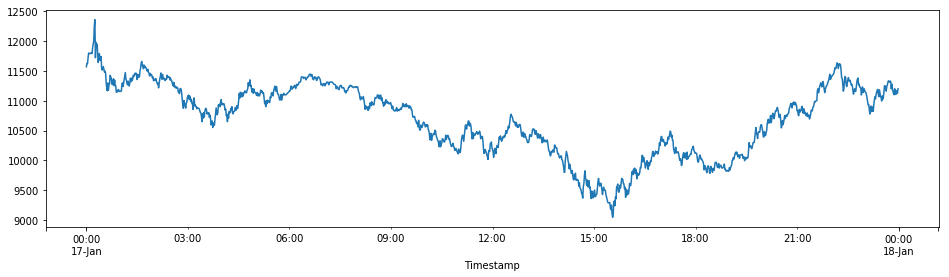

In [30]:
data.loc['Jan 17th 2018'].Close.plot(figsize=(16, 4)); 

We can also select less specific date ranges. How's January? 

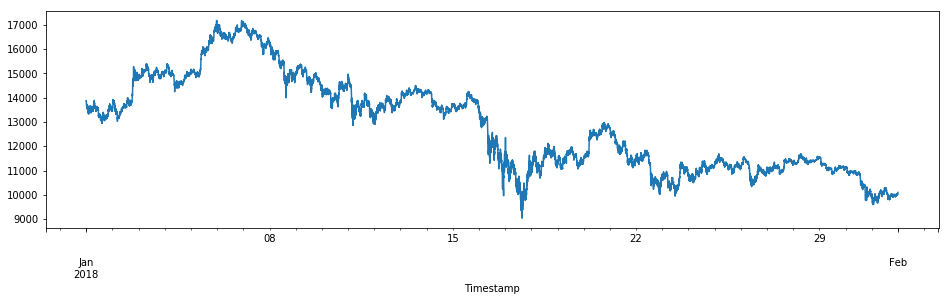

In [31]:
data.loc['Jan 2018'].Close.plot(figsize=(16, 4)); # <--- Pandas... is... awesome 

Let's see those days between the 15th and the 22nd. Let's select in a different way, for the sake of giggles. 

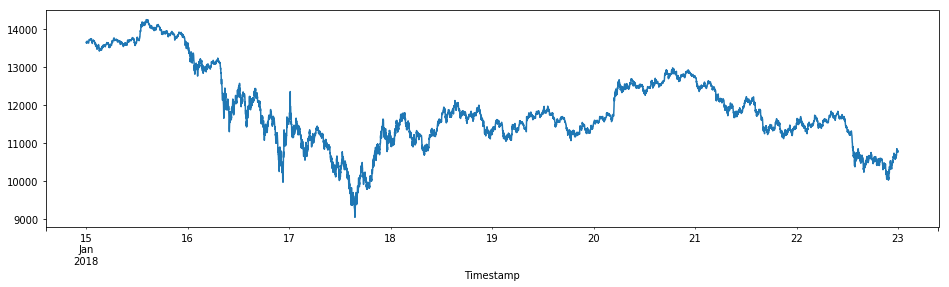

In [32]:
data.loc['01/15/2018':'01/22/2018'].Close.plot(figsize=(16, 4));  # <--- remember, American dates are less error prone in Pandas 

Interesting. What were things like during that "drop"? From our first chart, we saw it was on the 17th, between 3PM and 4PM 

_(btw there is [lots of stuff on Pandas for Timezones](https://pandas.pydata.org/pandas-docs/stable/timeseries.html#time-zone-handling), but we won't go into it here. Assume it's [GMT](https://i.imgur.com/84XItMo.gif) for argument's sake)_

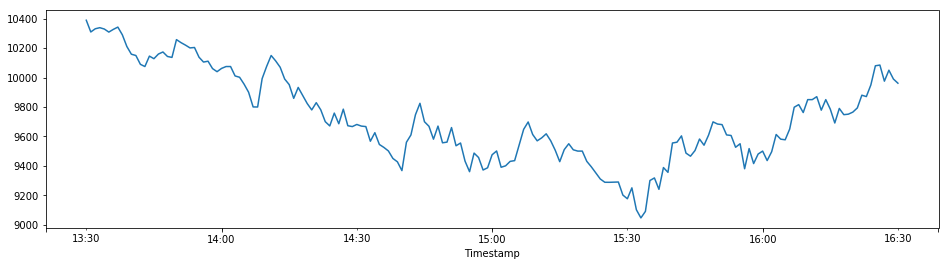

In [33]:
data.loc['01/17/2018 1:30PM':'01/17/2018 4:30PM'].Close.plot(figsize=(16, 4));  # yep, minutes, seconds, up to nanoseconds actually! 

How did traders react? Let's get the volume 

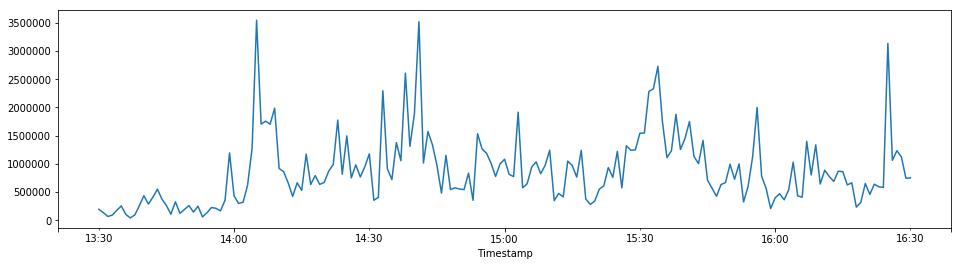

In [34]:
data.loc['01/17/2018 1:30PM':'01/17/2018 4:30PM']['Volume_(Currency)'].plot(figsize=(16, 4));

And here, we reach the limits of our dear Timestamps. 

Let's think about this objectively. The price on Jan 17th, at 3h00m00s makes sense. But the volume "in that moment"? It's a bit non-sensical. Some datasets (this one probably included) will treat data as being "since the last timestamp", but real world data may not be so forgiving. 

Counting using timestamps is like asking _how many people went into McDonnals at an exact moment_. Probably none. It does't tell us much. 

We think in terms of people "per minute", or "per hour". 

So... Let's get our volume per minute! For this, we can use [resample](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&cad=rja&uact=8&ved=0ahUKEwi3jfnKgNnaAhUGvBQKHRCwBd4QFggpMAA&url=https%3A%2F%2Fpandas.pydata.org%2Fpandas-docs%2Fstable%2Fgenerated%2Fpandas.DataFrame.resample.html&usg=AOvVaw1le9agxvLanaQp9zlNYG9Y)

In our case, we'll resample to every 5 minutes, and take the sum (because we want to sum the volume of those 5 minutes). 

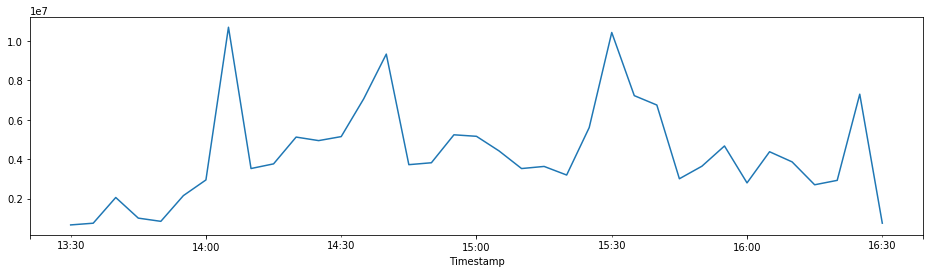

In [35]:
data.loc['01/17/2018 1:30PM':'01/17/2018 4:30PM']['Volume_(Currency)'].resample('5 min').sum().plot(
    figsize=(16, 4));

Wow! How much money (in dollars) was traded in the largest 10 minute peak?

In [36]:
money = data.loc['01/17/2018 1:30PM':'01/17/2018 4:30PM']['Volume_(Currency)'].resample('10 min').sum().max()

print('In 10 minutes, %0.1f dollars were traded in Bitcoin' % money)

In 10 minutes, 17657576.5 dollars were traded in Bitcoin


We just took the sum, but if we were looking at prices, would that make sense? Probably not, we would resample, and take the mean: 

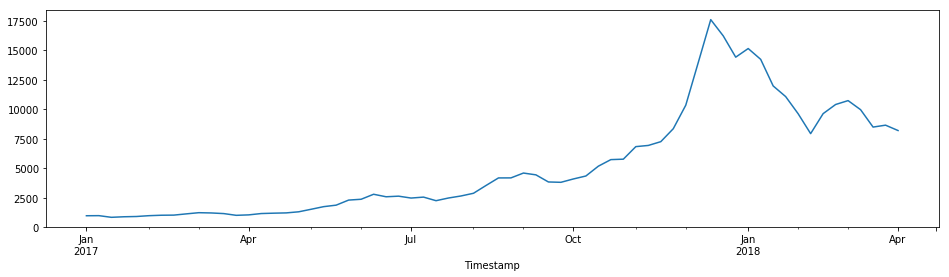

In [37]:
data.resample('W').Close.mean().plot(figsize=(16, 4));  # the mean weekly closing prices, since 2015

Time... is... cool. 

What if we wanted to know the total amount of money that has been traded in bitcoin? 

One way would simply be to sum it, but that does't give us any idea of how that total varied over time: 

In [38]:
data['Volume_(Currency)'].sum()

51301590508.0701

One cooler way to see this over time is to use the cumulative sum:

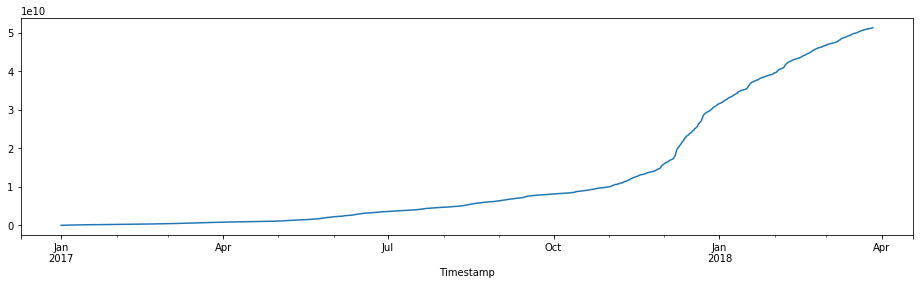

In [39]:
data['Volume_(Currency)'].cumsum().plot(figsize=(16, 4));  # the total volume traded since the start 

As you've learnt before, there are many cool [methods for groupby](http://pandas.pydata.org/pandas-docs/stable/api.html#groupby). 

Let's say we want to know "what was the record for total volume per week, over time?" Naturally the record can only go up, and will have some "steps". 

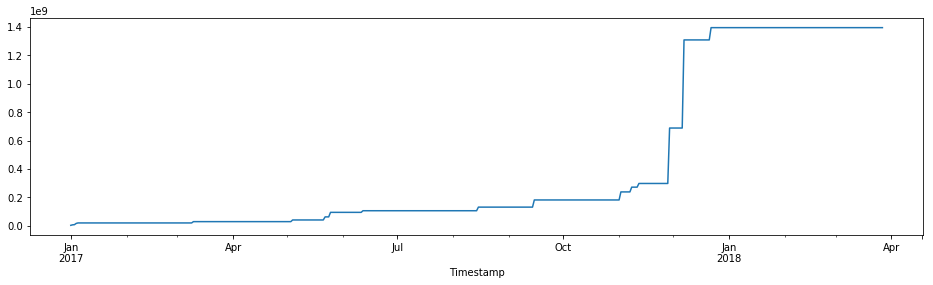

In [40]:
data['Volume_(Currency)'].resample('d').sum().cummax().plot(figsize=(16, 4)); 

A more important question however may be 
> "what were the biggest variations in price?"

For this, we might find it usefull to calculate consecutive differences between periods, using [diff](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.diff.html)

In [41]:
data.Close.diff().head()  # this can take a few seconds to run

Timestamp
2017-01-01 00:00:00     NaN
2017-01-01 00:01:00    0.00
2017-01-01 00:02:00    0.00
2017-01-01 00:03:00    0.01
2017-01-01 00:04:00    0.03
Name: Close, dtype: float64

The first entrance is NaN, which makes sense because it's got no previous day to substract. 

What do the diffs look like? 

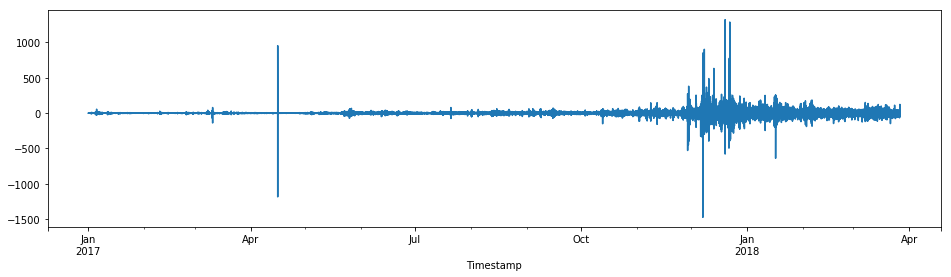

In [42]:
data.Close.diff().plot(figsize=(16, 4));

Not particularly useful. How about on a particular day? 

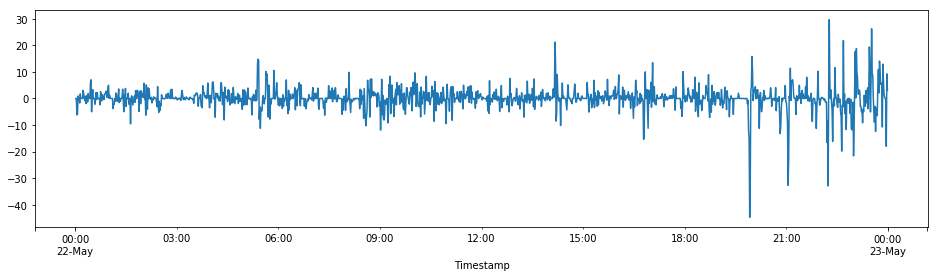

In [43]:
data.loc['May 22nd 2017'].Close.diff(periods=1).plot(figsize=(16, 4));

 #### Rolling window

Rolling windows do what their name suggest: aggregate of the previous X periods (and, for instance, take the mean). They are very useful to smooth choppy timeseries and be less reactive to noise. 

We can choose to center the window (look back and forward), but in general we only want to take into account information from the past, so we should use `center=False` (which is the default)

Let's say it's December 18th, in the early morning, and we are at our terminal. 

##### Midnight and a bit... 

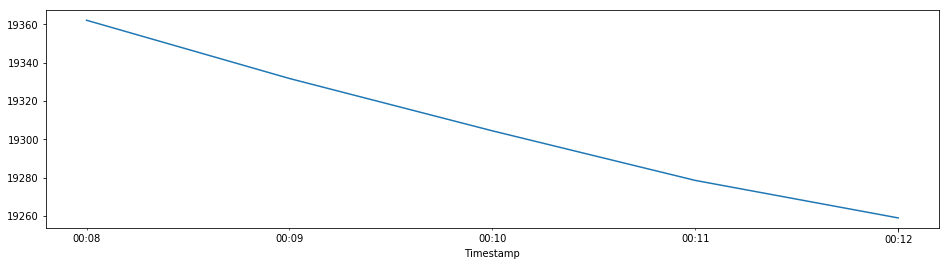

In [44]:
data.loc['Dec 18th 2017 00:08:00':'Dec 18th 2017 00:12:00', 'Weighted_Price'].plot(figsize=(16, 4));

![](https://i.imgflip.com/29iucd.jpg)

##### A few minutes pass... 

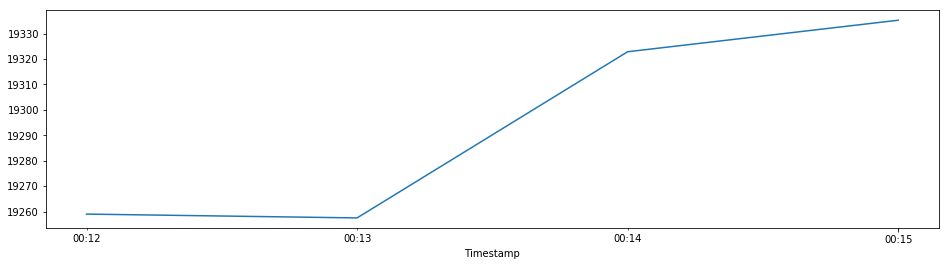

In [45]:
data.loc['Dec 18th 2017 00:12:00':'Dec 18th 2017 00:15:00', 'Weighted_Price'].plot(figsize=(16, 4));

![](https://i.redditmedia.com/VE5dgdjQ8FKZ47gdxJdQ07q36bsZVyhvAmllvLdtTnI.jpg?w=534&s=ce869cd0d8630cd420af7fa72b3c296d)

##### A few more minutes... 

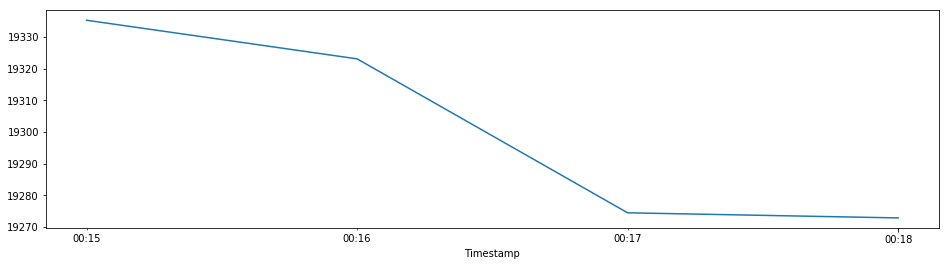

In [46]:
data.loc['Dec 18th 2017 00:15:00':'Dec 18th 2017 00:18:00', 'Weighted_Price'].plot(figsize=(16, 4));

![](https://i.imgflip.com/29iucd.jpg)

I think you get the picture. What's going on tis that we're being extremely reactive to noise, and missing the underlying process. What is in fact going on is that we are in a free-fall, but it might not be obvious unless we look at the slightly broader picture. 

In other words, assuming there is an underlying process, we can assume the recent past should carry some weight. How much weight? A rolling [window](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rolling.html) of weight! 

#### The first hour of Dec 18th 2017, as seen by traders

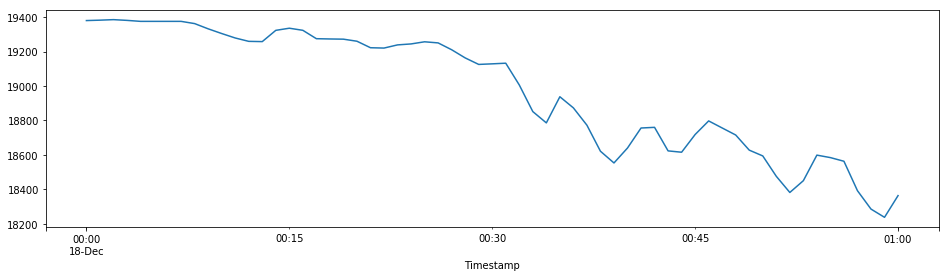

In [47]:
data.loc['Dec 18th 2017 00:00:00':'Dec 18th 2017 01:00:00', 'Weighted_Price'].plot(figsize=(16, 4));

#### The first hour of Dec 18th 2017, as seen by a rolling window of 10 minutes

In [48]:
# this is just the raw data, so we can apply a rolling window on it  
first_hour = data.loc['Dec 18th 2017 00:00:00':'Dec 18th 2017 01:00:00', 'Weighted_Price']

# notice the window size as a parameter of rolling, feel free to mess around with that parameter 
# and the center set to False. That's because we don't want to use data from the future! 
# Also notice how we use the mean. We can use many others. Try changing it! 
window_size = 10 
first_hour_rolling_window = first_hour.rolling(window=window_size, center=False).mean()

What do these look like? 

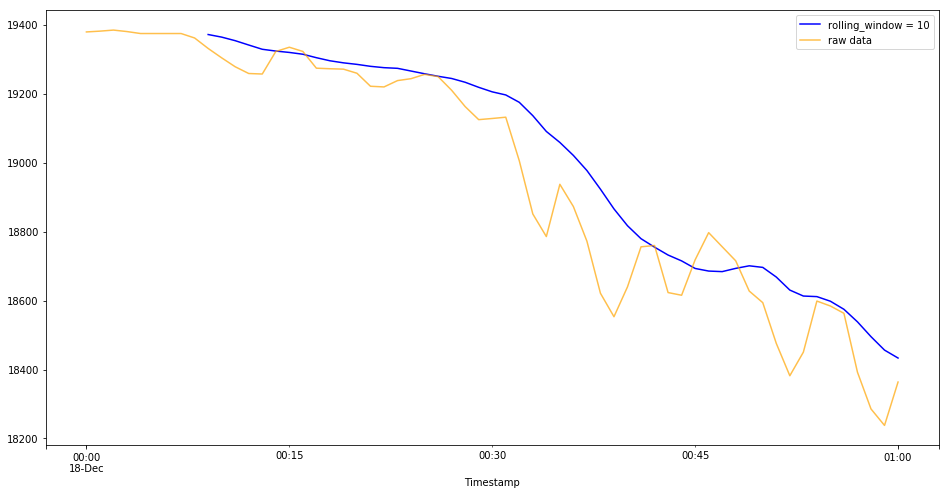

In [49]:
# Let's plot these together 
first_hour_rolling_window.plot(figsize=(16, 8), color='b', label='rolling_window = %0.0f' % window_size);
first_hour.plot(figsize=(16, 8), label='raw data', alpha=.7, ls='-', color='orange');
plt.legend();

(_Note: In case you are curious about what would have happened if you had interpreted the yellow line as a potential recovery... It doesn't end well._)

### Let's ask some more questions of this dataset! 

Back to the entire  dataset. Let's answer the following question:
> What was the weekly change in price, over time? 

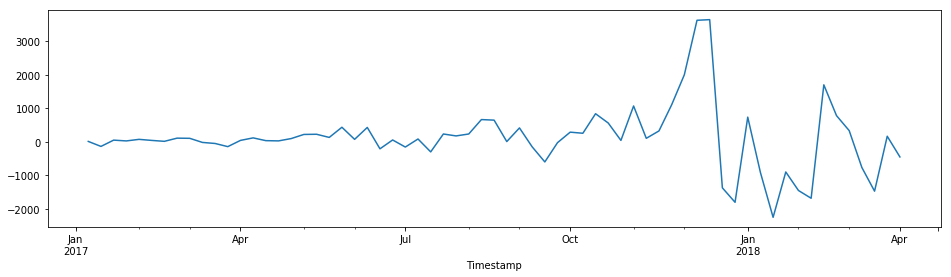

In [50]:
# resample to weekly, get the mean Close price (per week), calculate the differences, and plot them 
data.resample('W').Close.mean().diff(periods=1).plot(figsize=(16, 4));

We are observing something that makes sense. As the manitude gets bigger, so does the volatility. It makes more sense for bitcoin to go down \\$100 in a week when it was \\$5000 than when it was at \\$20. 

What we actually want... is the percent change. 

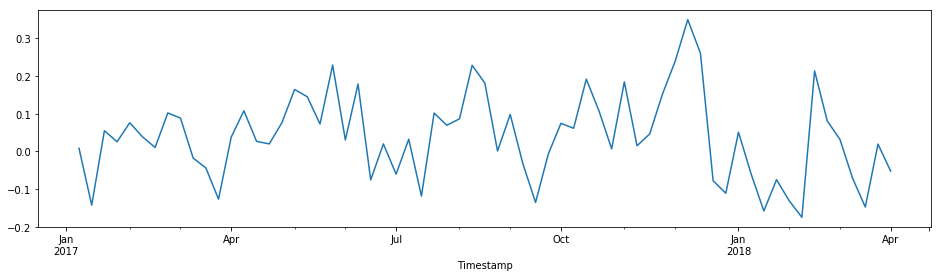

In [51]:
# resample to weekly, take the mean close price (weekly), and calcualte the percentage change 
data.resample('W').Close.mean().pct_change().plot(figsize=(16, 4));

Interestingly enough, this chart seems to tell us that while bitcoin varies a lot, it is relatively consistent, with weekly variations of +/- 30% being as big as it gets. As the magnitude becoming larger it becomes more newsworthy _"up one thousand dollars!!!"_, but the underlying percent change does't seem so radically altered. 

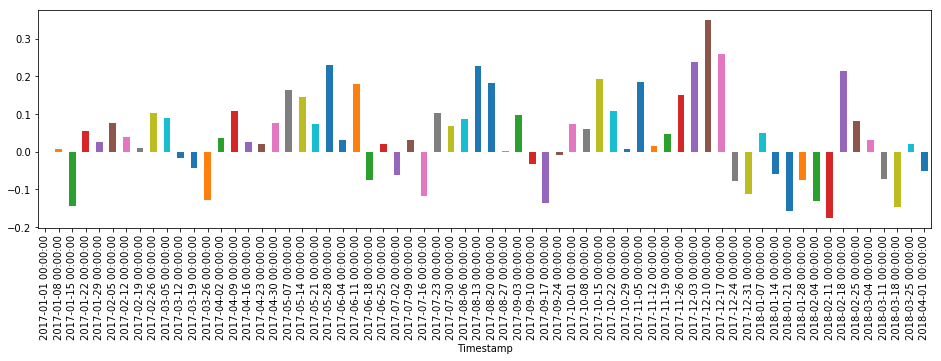

In [52]:
data.resample('W').Close.mean().pct_change().plot(kind='bar', figsize=(16, 4));

Wow that is one ugly X axis. Unfortunately this is a [known issue](https://stackoverflow.com/questions/19143857/pandas-bar-plot-xtick-frequency?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa) with Pandas, and when it happens, it requires a bit of copy-pasting around to fix. 

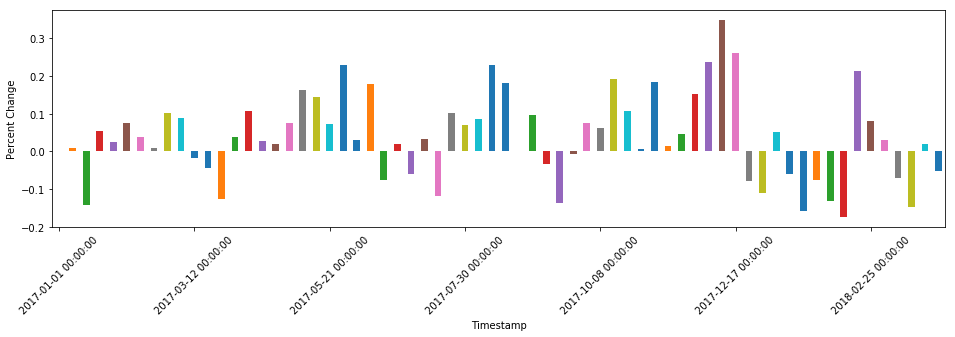

In [53]:
# our actual chart 
ax = data.resample('W').Close.mean().pct_change().plot(kind='bar', figsize=(16, 4), rot=45);

# this fixes the axis. 
# I wouldn't spend too much time in this horrible Matplotlib code, just know it exists. 

n = 10
ticks = ax.xaxis.get_ticklocs()
ticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]  # <---- blearghk!!
ax.xaxis.set_ticks(ticks[::n])
ax.xaxis.set_ticklabels(ticklabels[::n])
plt.ylabel('Percent Change')
plt.show()

Fun pattern, huh? Growth seems to bring more growth, and then crashes quite spectacularly, and the cycle re-starts. 

Great, we've covered a number of methods for dealing with Timeseries. 

Next up, we go and try to examine the full stockmarket. Only to find, to our dismay, that we need multi-indexing. [What is multi-indexing, I hear you ask?](https://www.youtube.com/watch?v=gC24hhNbXN0)
#### Move on to the Part 2 of 3 of BLU04 to find out! 

----

### **Summary of the methods we have learnt in this unit:**
* `pd.to_datetime()` - this allows you to create datetime format and gives you access to several methods that pandas has specifically to handle dates 
* We need to have a datetime sorted index!!
* Selection: `dataframe.loc['Jan 17th 2018]` to select the 17th of January, 2018 
    * Remember pandas is really helpful here as you can even do something like `dataframe.loc['Jan 2018']` or even ranges `dataframe.loc['01/15/2018':'01/22/2018']`
*  How to resample, e.g: `.resample('5min').sum()`. Don't forget that after resampling we need an aggregation function! 
    * few new aggregation functions that we've talked: 
        * `cumsum()`
        * `cummax()`
* We have also learnt how to calculate the difference between periods, using `diff()`
* Rolling windows: `.rolling()` that allows us to specify the rolling window size 